# 提供银行精准营销解决方案

In [232]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
# 加载数据
import pandas as pd
import os


BANK_PATH = 'dataset'
def load_data(bank_path=BANK_PATH):
    csv_path=os.path.join(bank_path, "train_set.csv")
    return pd.read_csv(csv_path)
bank_data = load_data()
bank_data.drop(['ID'],inplace=True,axis=1)
bank_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0


In [263]:
# 测试集
test_data=pd.read_csv(os.path.join(BANK_PATH,'test_set.csv'))
test_data.drop(['ID'],inplace=True,axis=1)
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,51,housemaid,married,unknown,no,174,no,no,telephone,29,jul,308,3,-1,0,unknown
1,32,management,married,tertiary,no,6059,yes,no,cellular,20,nov,110,2,-1,0,unknown
2,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown
3,32,student,single,tertiary,no,64,no,no,cellular,30,jun,598,4,105,5,failure
4,41,housemaid,married,secondary,no,0,yes,yes,cellular,15,jul,368,4,-1,0,unknown


In [92]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [93]:
# info() 方法可以快速查看数据的描述，特别是总行数、每个属性的类型和非空值的数量
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 17 columns):
age          25317 non-null int64
job          25317 non-null object
marital      25317 non-null object
education    25317 non-null object
default      25317 non-null object
balance      25317 non-null int64
housing      25317 non-null object
loan         25317 non-null object
contact      25317 non-null object
day          25317 non-null int64
month        25317 non-null object
duration     25317 non-null int64
campaign     25317 non-null int64
pdays        25317 non-null int64
previous     25317 non-null int64
poutcome     25317 non-null object
y            25317 non-null int64
dtypes: int64(8), object(9)
memory usage: 3.3+ MB


In [94]:
# 查看标签比例
bank_data["y"].value_counts()

0    22356
1     2961
Name: y, dtype: int64

In [95]:
# 工作类型分类
bank_data["job"].value_counts()

blue-collar      5456
management       5296
technician       4241
admin.           2909
services         2342
retired          1273
self-employed     884
entrepreneur      856
unemployed        701
housemaid         663
student           533
unknown           163
Name: job, dtype: int64

In [19]:
# 婚姻状态
bank_data["marital"].value_counts()

married     15245
single       7157
divorced     2915
Name: marital, dtype: int64

In [9]:
# 教育程度
bank_data["education"].value_counts()

secondary    12957
tertiary      7447
primary       3848
unknown       1065
Name: education, dtype: int64

In [10]:
# 是否有违约记录
bank_data["default"].value_counts()

no     24869
yes      448
Name: default, dtype: int64

In [11]:
# 是否有个人贷款
bank_data["loan"].value_counts()

no     21258
yes     4059
Name: loan, dtype: int64

In [12]:
# 是否有住房贷款
bank_data["housing"].value_counts()

yes    14020
no     11297
Name: housing, dtype: int64

In [13]:
# 与客户联系的沟通方式
bank_data["contact"].value_counts()

cellular     16391
unknown       7281
telephone     1645
Name: contact, dtype: int64

In [14]:
# 上一次活动的结果
bank_data["poutcome"].value_counts()

unknown    20677
failure     2735
other       1070
success      835
Name: poutcome, dtype: int64

In [96]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,40.935379,1357.555082,15.835289,257.732393,2.772050,40.248766,0.591737,0.116957
std,10.634289,2999.822811,8.319480,256.975151,3.136097,100.213541,2.568313,0.321375
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1435.000000,21.000000,317.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,3881.000000,55.000000,854.000000,275.000000,1.000000


In [116]:
#  训练集拆分
new_bank_data = bank_data.copy()
bank_set=new_bank_data.iloc[:,bank_data.columns!='y']
print(train_X.head())
bank_labels=new_bank_data.iloc[:,bank_data.columns=='y']
print(train_y.head())

   age         job   marital  education default  balance housing loan  \
0   43  management   married   tertiary      no      291     yes   no   
1   42  technician  divorced    primary      no     5076     yes   no   
2   47      admin.   married  secondary      no      104     yes  yes   
3   28  management    single  secondary      no     -994     yes  yes   
4   42  technician  divorced  secondary      no     2974     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  
0   unknown    9   may       150         2     -1         0  unknown  
1  cellular    7   apr        99         1    251         2    other  
2  cellular   14   jul        77         2     -1         0  unknown  
3  cellular   18   jul       174         2     -1         0  unknown  
4   unknown   21   may       187         5     -1         0  unknown  
   y
0  0
1  0
2  0
3  0
4  0


In [117]:
bank_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown
1,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other
2,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown
3,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown
4,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown


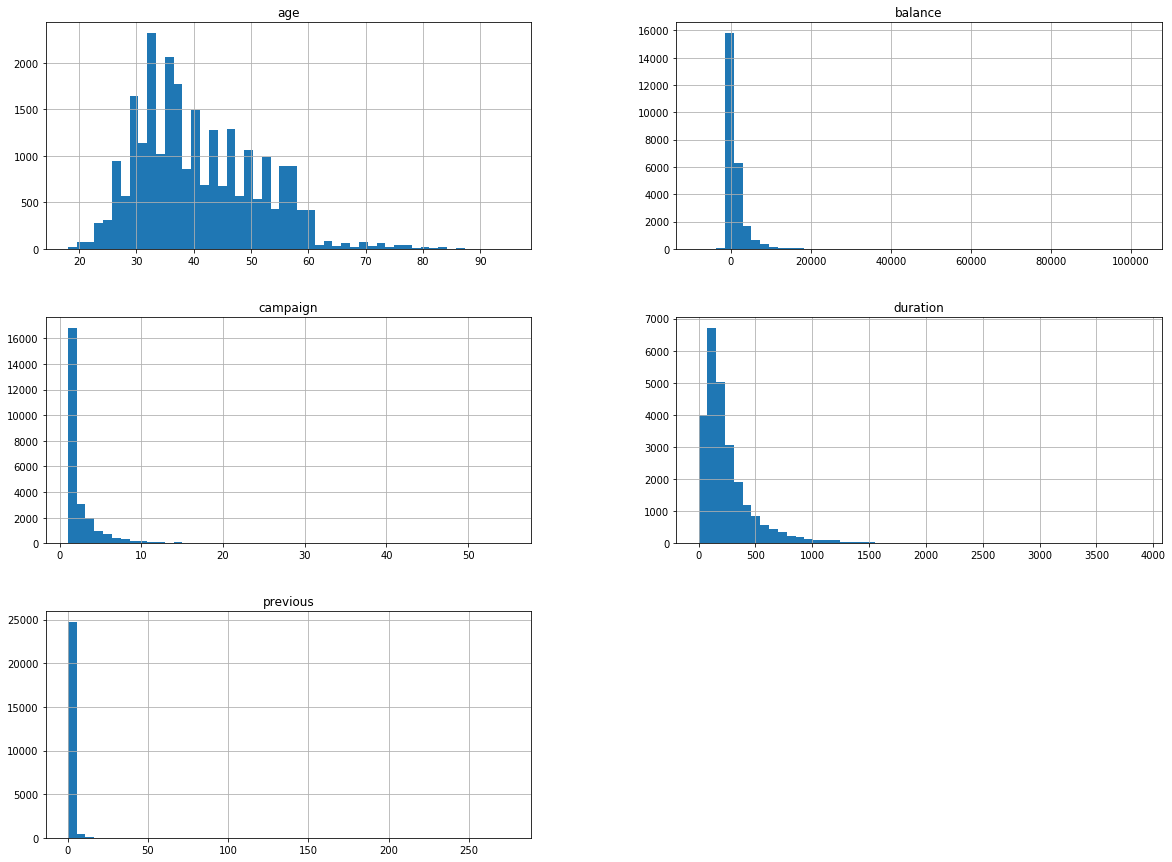

In [73]:
# 观察每个数值属性的柱状图
import matplotlib.pyplot as plt
bank_set.hist(bins=50, figsize=(20,15))
plt.show()

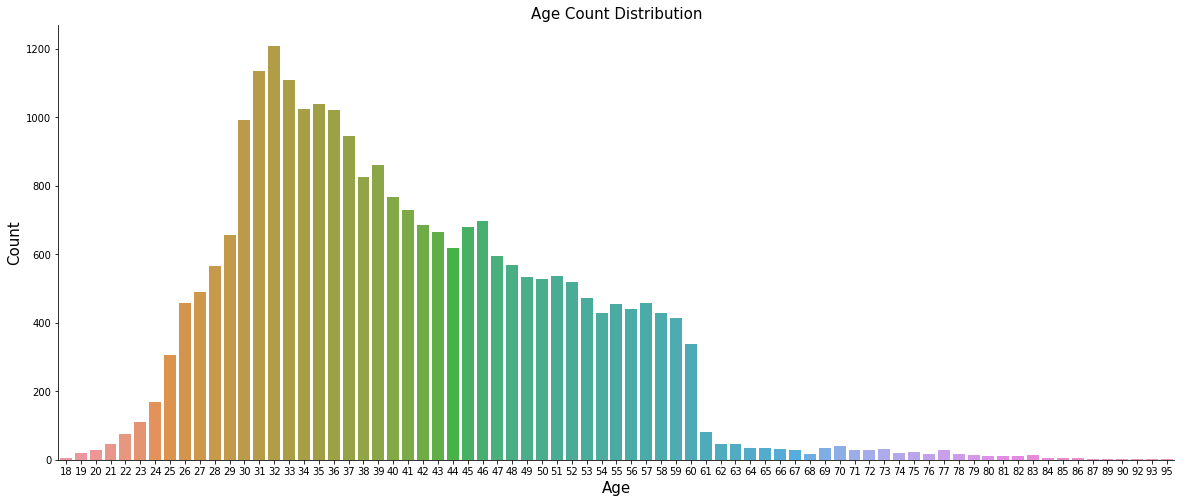

In [74]:
# 年龄
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_set)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [75]:
print('第一四分位数: ', bank_set['age'].quantile(q = 0.25))
print('第二四分位数: ', bank_set['age'].quantile(q = 0.50))
print('第三四分位数: ', bank_set['age'].quantile(q = 0.75))
print('第四四分位数: ', bank_set['age'].quantile(q = 1.00))
print('age > ', bank_set['age'].quantile(q = 0.75) + 
                      1.5*(bank_set['age'].quantile(q = 0.75) - bank_set['age'].quantile(q = 0.25)), '属于异常值')


第一四分位数:  33.0
第二四分位数:  39.0
第三四分位数:  48.0
第四四分位数:  95.0
age >  70.5 属于异常值


In [109]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
    return dataframe
age(bank_set)

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome
0,2,management,married,tertiary,no,291,yes,no,unknown,may,2,2,0,unknown
1,2,technician,divorced,primary,no,5076,yes,no,cellular,apr,1,1,2,other
2,2,admin.,married,secondary,no,104,yes,yes,cellular,jul,1,2,0,unknown
3,1,management,single,secondary,no,-994,yes,yes,cellular,jul,2,2,0,unknown
4,2,technician,divorced,secondary,no,2974,yes,no,unknown,may,3,5,0,unknown
5,3,services,divorced,secondary,no,450,no,no,unknown,jun,1,1,0,unknown
6,1,management,single,tertiary,no,1716,no,no,cellular,nov,2,4,0,unknown
7,2,management,single,tertiary,no,-359,no,no,telephone,aug,1,2,0,unknown
8,1,technician,single,secondary,no,309,yes,yes,cellular,aug,1,3,0,unknown
9,3,management,married,tertiary,no,4777,no,yes,unknown,jun,1,3,0,unknown


In [76]:
# 分类值处理

from sklearn.preprocessing import OrdinalEncoder
bank_cat = bank_set[['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month']]
ordinal_encoder = OrdinalEncoder()
cat_encoded = ordinal_encoder.fit_transform(bank_cat)
cat_encoded


array([[4., 1., 2., ..., 2., 3., 8.],
       [9., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 3., 5.],
       ...,
       [1., 0., 0., ..., 2., 3., 8.],
       [2., 0., 2., ..., 0., 3., 9.],
       [4., 1., 2., ..., 0., 3., 9.]])

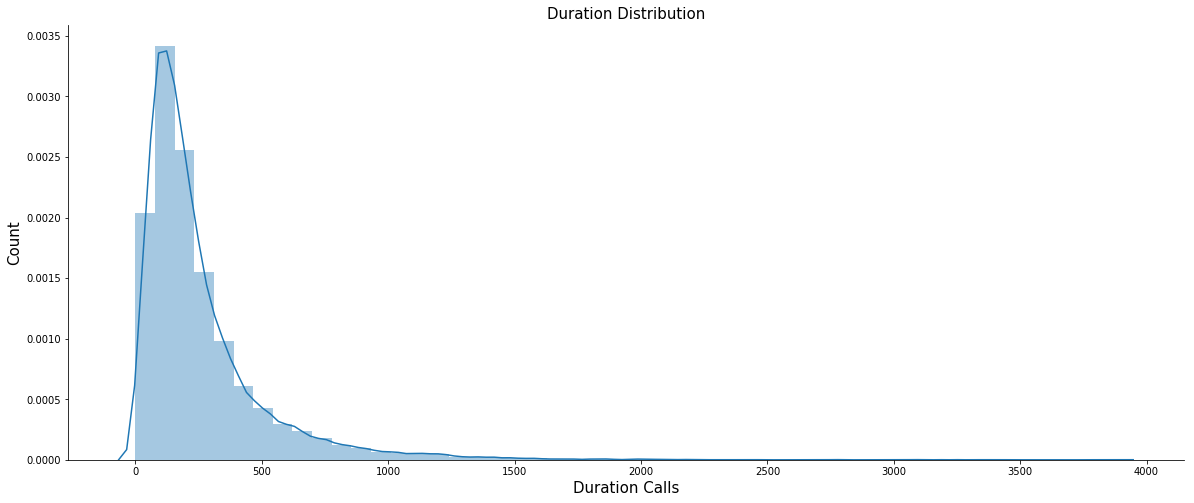

In [80]:
# 联系时长
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.distplot(bank_set['duration'])
ax.set_xlabel('Duration Calls', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Duration Distribution', fontsize=15)
sns.despine()


In [107]:

print('第一四分位数: ', bank_set['duration'].quantile(q = 0.25))
print('第二四分位数: ', bank_set['duration'].quantile(q = 0.50))
print('第三四分位数: ', bank_set['duration'].quantile(q = 0.75))
print('第四四分位数: ', bank_set['duration'].quantile(q = 1.00))
print('duration > ', bank_set['duration'].quantile(q = 0.75) + 
                      1.5*(bank_set['duration'].quantile(q = 0.75) - bank_set['age'].quantile(q = 0.25)), '属于异常值')


第一四分位数:  103.0
第二四分位数:  181.0
第三四分位数:  317.0
第四四分位数:  3881.0
duration >  743.0 属于异常值


In [108]:
def duration(data):
    data.loc[data['duration'] <= 103.0, 'duration'] = 1
    data.loc[(data['duration'] > 103.0) & (data['duration'] <= 181.0)  , 'duration']    = 2
    data.loc[(data['duration'] > 181.0) & (data['duration'] <= 317.0)  , 'duration']   = 3
    data.loc[(data['duration'] > 317.0) & (data['duration'] <= 743.0), 'duration'] = 4
    data.loc[data['duration']  > 743.0 , 'duration'] = 5
    return data
duration(bank_set)["duration"].value_counts()

2    6357
1    6341
3    6313
4    5002
5    1304
Name: duration, dtype: int64

In [260]:
new_bank_data = bank_data.copy()
bank_set=new_bank_data.iloc[:,bank_data.columns!='y']
bank_labels=new_bank_data.iloc[:,bank_data.columns=='y']

#  因为 pdays 存在很多异常值， 我们这里去掉该特征
bank_set.drop(['pdays'],inplace=True,axis=1)
# day 有很多不同值，而且跟月份有关，这里去掉
bank_set.drop(['day'],inplace=True,axis=1)

bank_set = duration(bank_set)
bank_set = age(bank_set)

bank_set.head()


,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome
0,2,management,married,tertiary,no,291,yes,no,unknown,may,2,2,0,unknown
1,2,technician,divorced,primary,no,5076,yes,no,cellular,apr,1,1,2,other
2,2,admin.,married,secondary,no,104,yes,yes,cellular,jul,1,2,0,unknown
3,1,management,single,secondary,no,-994,yes,yes,cellular,jul,2,2,0,unknown
4,2,technician,divorced,secondary,no,2974,yes,no,unknown,may,3,5,0,unknown


In [261]:
from sklearn.preprocessing import LabelEncoder

cat_attribs = ['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month']
bank_cat = bank_set[cat_attribs]
ordinal_encoder = OrdinalEncoder()
labelencoder_X = LabelEncoder()
for item in cat_attribs:
    bank_set[item] = labelencoder_X.fit_transform(bank_set[item])
    bank_set[item] = bank_set[item]+1
bank_set.head()
from sklearn.preprocessing import StandardScaler
bank_set['balance']=StandardScaler().fit_transform(bank_set[['balance']])
bank_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome
0,2,5,2,3,1,-0.355546,2,1,3,9,2,2,0,4
1,2,10,1,1,1,1.239579,2,1,1,1,1,1,2,2
2,2,1,2,2,1,-0.417885,2,2,1,6,1,2,0,4
3,1,5,3,2,1,-0.783913,2,2,1,6,2,2,0,4
4,2,10,1,2,1,0.538857,2,1,3,9,3,5,0,4


In [264]:
test_data.drop(['pdays'],inplace=True,axis=1)
test_data.drop(['day'],inplace=True,axis=1)

test_data = duration(test_data)
test_data = age(test_data)

for item in cat_attribs:
    test_data[item] = labelencoder_X.fit_transform(test_data[item])
    test_data[item] = test_data[item]+1
test_data['balance']=StandardScaler().fit_transform(test_data[['balance']])
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome
0,3,4,2,4,1,-0.367399,1,1,2,6,3,3,0,4
1,1,5,2,3,1,1.406076,2,1,1,10,2,2,0,4
2,3,6,2,1,1,-0.419835,1,1,2,6,2,3,0,4
3,1,9,3,3,1,-0.400548,1,1,1,7,4,4,5,1
4,2,4,2,2,1,-0.419835,2,2,1,6,4,4,0,4


In [265]:
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome
0,3,4,2,4,1,-0.367399,1,1,2,6,3,3,0,4
1,1,5,2,3,1,1.406076,2,1,1,10,2,2,0,4
2,3,6,2,1,1,-0.419835,1,1,2,6,2,3,0,4
3,1,9,3,3,1,-0.400548,1,1,1,7,4,4,5,1
4,2,4,2,2,1,-0.419835,2,2,1,6,4,4,0,4


## 选择模型并训练

In [278]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
gbm1=GradientBoostingClassifier(random_state=42)
gbm1.fit(bank_set,bank_labels)
LOGCV = (cross_val_score(gbm1, bank_set, bank_labels, cv=10, n_jobs=1, scoring = 'roc_auc'))
LOGCV


array([0.9172321 , 0.90556858, 0.90875281, 0.91905641, 0.92003321,
       0.90284594, 0.89469285, 0.91603634, 0.91578315, 0.90690791])

In [279]:
y_pred=gbm1.predict(bank_set)
y_predprob=gbm1.predict_proba(bank_set)[:,1]
print("AUC Score(Train data): %f" % roc_auc_score(bank_labels,y_predprob))

AUC Score(Train data): 0.918187


In [277]:
LOGCV.mean()

0.8586122642433123

In [271]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(bank_set,bank_labels)
# logpred = logmodel.predict(X_test)
# print(confusion_matrix(y_test, logpred))
# print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, bank_set, bank_labels, cv=10, n_jobs=1, scoring = 'roc_auc').mean())
LOGCV

0.8586122642433123